In [89]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [90]:
df = pd.read_csv('/Users/aditirajesh/Desktop/program_files/python/ml_models/abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [91]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [92]:
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

<Axes: >

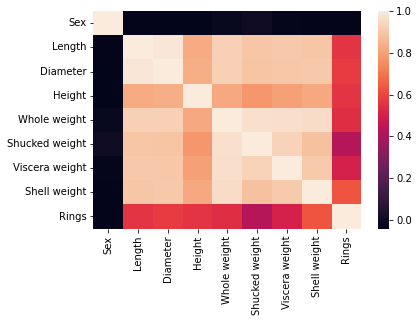

In [93]:
corr = df.corr()
sns.heatmap(corr)

In [94]:
x = df.drop(columns=['Sex'])

In [95]:
sc = StandardScaler()
x_sc = sc.fit_transform(x)

In [96]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_sc)

In [97]:
best_silhouette = -1 
best_k = -1 

In [ ]:
for k in range(2,11):
    k_means = KMeans(n_clusters=k,random_state=42)
    k_means.fit(x_pca)
    cluster_labels = k_means.labels_
    silhouette_avg = silhouette_score(x_pca,cluster_labels)

    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_k = k 


In [99]:
k_means_b = KMeans(n_clusters=best_k,random_state=42)
k_means_b.fit(x_pca)
labels_best = k_means_b.labels_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


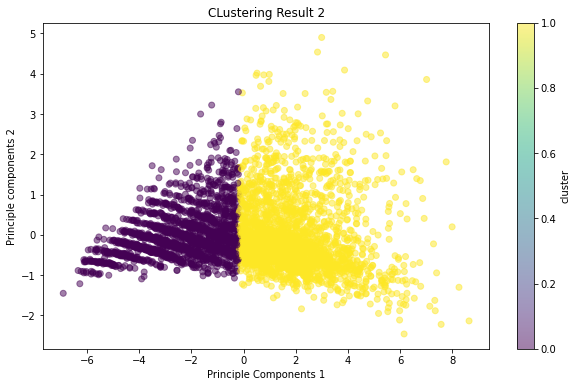

In [100]:

plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=labels_best,cmap='viridis',alpha=0.5)
plt.title(f"CLustering Result {best_k}")
plt.xlabel("Principle Components 1")
plt.ylabel("Principle components 2")
plt.colorbar(label='cluster')
plt.show()